# 6. LogPappを目的変数、特徴ベクトルを2D記述子とし、データセットの795化合物に対して回帰を行う機械学習プログラムを作成せよ。学習器は線形回帰, リッジ回帰, Support Vector Regression, Random Forest回帰, LightGBM等を用いることができるよう準備すること。

In [3]:
import pandas as pd
desc_2d = pd.read_csv("data/2d_desc.csv", index_col=0)

In [2]:
desc_2d.shape

(694, 203)

In [3]:
desc_2d.tail()

,index,No.,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
689,689,787.0,c1(C(N3CCCCCCN(C)C(=O)c2c(O[C@]4[C@@]3CCCC4)cc...,13.448096,-0.083529,13.448096,0.030521,0.671119,436.556,404.300,...,0,0,0,0,0,0,0,0,0,0
690,690,788.0,[C@]1(CC(N4[C@@]2CCCC[C@]2Oc3c(C(=O)N(CC)CCCCC...,13.442941,0.033215,13.442941,0.033215,0.607903,437.604,400.308,...,0,0,0,0,0,0,0,0,0,0
691,691,789.0,c1(C(N4[C@@]2CCCC[C@@]2Oc3c(C(=O)N(C)CCCCC4)cc...,13.552823,-0.080508,13.552823,0.032686,0.673741,436.556,404.300,...,0,0,0,0,0,0,0,0,0,0
692,692,790.0,c1(C(N3CCCCCN(CC)C(=O)c2c(cccc2)OC[C@@]3[C@@](...,13.271345,-0.178548,13.271345,0.025946,0.774976,442.585,412.345,...,0,0,0,0,0,1,0,0,0,0
693,693,793.0,[C@@](C)(C)CC(N3[C@@]2[C@](CCCC2)OC1=CCC=C[C@@...,13.159732,0.013122,13.159732,0.013122,0.600789,426.601,388.297,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# 説明変数に 2D記述子 を利用
X = desc_2d.drop(["MolLogP","index",  "No.", "SMILES"], axis=1)
 
# 目的変数に "MolLogP" を利用
Y = desc_2d["MolLogP"]

##  線形回帰

In [18]:
X.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.276753,0.261638,12.276753,0.261638,0.529981,318.481,286.225,318.242756,128,0,...,0,0,0,0,0,0,0,0,3,0
1,12.249370,0.216991,12.249370,0.216991,0.534284,328.476,298.236,328.227106,130,0,...,0,0,0,0,0,0,0,0,3,0
2,11.885490,0.182469,11.885490,0.182469,0.531211,266.361,242.169,266.175070,106,0,...,0,0,0,0,0,0,0,0,2,0
3,12.090771,0.216478,12.090771,0.216478,0.530771,292.443,262.203,292.227106,118,0,...,0,0,0,0,0,0,0,0,3,0
4,12.108951,0.139533,12.108951,0.139533,0.401309,328.929,301.713,328.149640,118,0,...,1,0,0,0,0,0,0,0,3,0


In [56]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def regression(model, x, y):
    X_train, X_test, Y_train ,Y_test = train_test_split(x, y)
    model.fit(X_train, Y_train)
    
    print(model.score(X_test, Y_test))
    
    plt.figure(figsize=(20,10))
    YY = Y_test.reset_index()
    plt.plot(Y_test.values,label="True")
    plt.plot(clf.predict(X_test), label="predicted")
    plt.legend()
    return model                                                    

0.9962032267462396


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

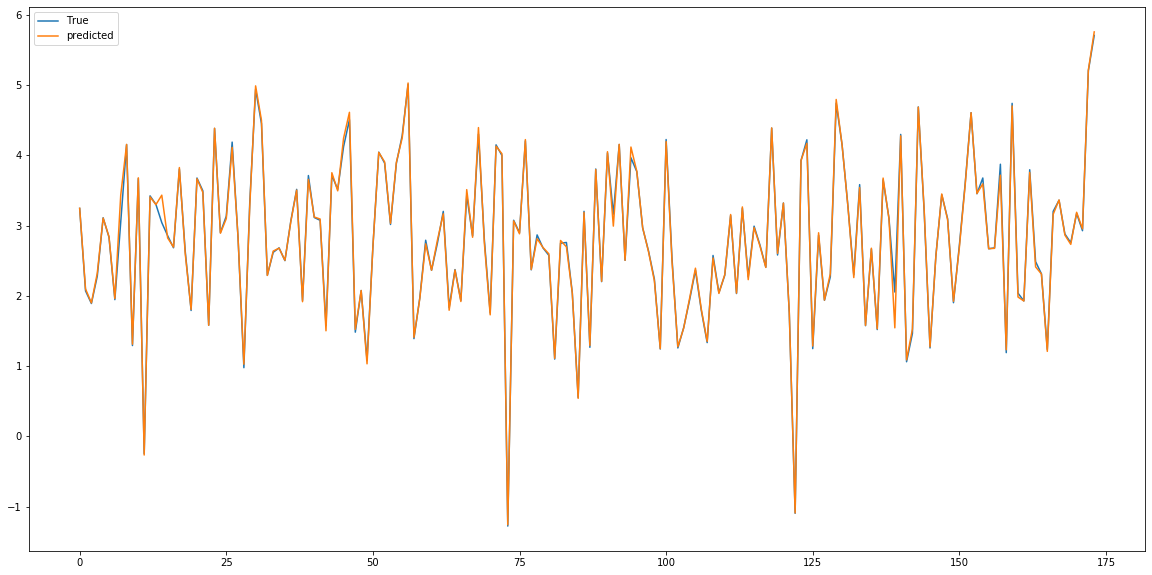

In [57]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
regression(clf, X, Y)

In [10]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
  
# 予測モデルを作成
clf.fit(X, Y)

[-6.74364347e-03  8.02085297e-04  3.34615618e-03 -3.45463241e-02
  2.67158301e-02  3.78611033e-01 -8.30446449e-02 -2.92657595e-01
 -9.72412493e-02  3.81766777e-03 -1.80832533e+00  1.65515053e+00
  1.72961171e+00  2.05034305e+00  7.39831547e-02 -4.94461841e-03
 -4.84129485e-02 -4.34244260e-02  3.43850970e-04 -2.86821872e-01
  5.31581621e-01 -4.72027853e-01 -6.12088902e-01  3.19798247e-02
  8.19340715e-02 -3.95659035e-02  5.93947202e-02  9.46762012e-02
  6.78268227e-03 -4.33815456e-02 -4.97094193e-04 -3.50641044e-01
  1.11612108e-14  3.90610160e-02  6.71252191e-02 -7.46132889e-03
  2.11582028e+00 -3.77035814e-01 -3.89376114e-01 -3.90280517e-01
 -3.89895322e-01 -3.88668633e-01 -3.88192632e-01 -3.73589502e-01
 -3.76038742e-01 -3.75383399e-01 -3.79978103e-01 -3.87704720e-01
 -3.88232604e-01 -3.87991918e-01 -3.89107290e-01 -5.80145694e-01
 -6.15960953e-01 -5.40235745e-01 -6.19104487e-01 -6.08576943e-01
 -5.99286075e-01 -5.92717243e-01 -6.01607740e-01 -9.51531909e-12
 -6.23840426e-01 -6.19325

In [ ]:
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

In [25]:
clf.predict(X)[130]

3.3655341909899854

In [26]:
Y[130]

3.361200000000002

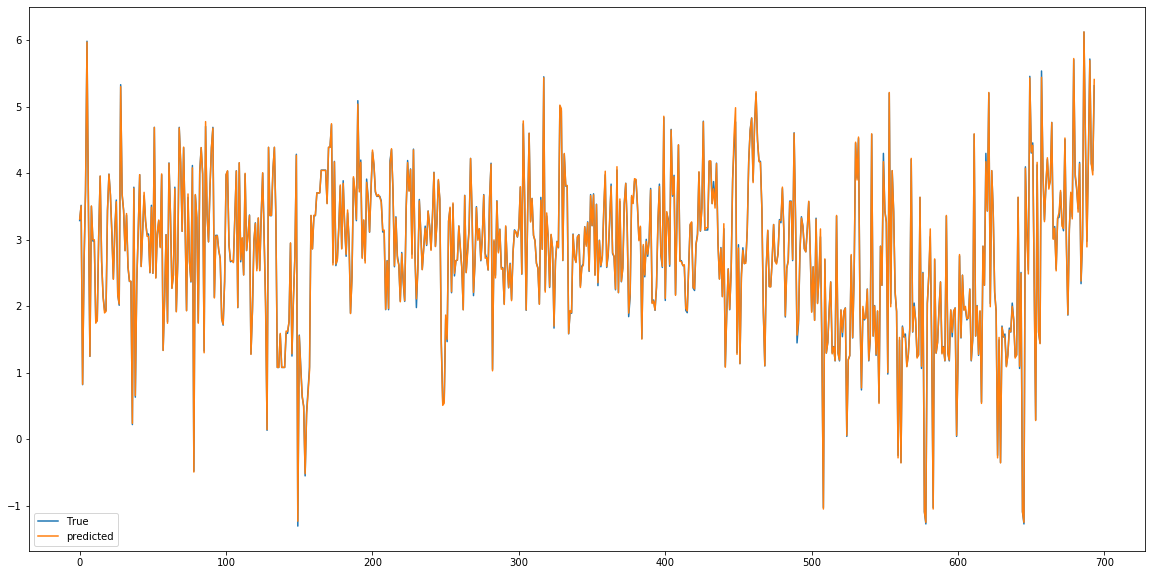

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(Y,label="True")
plt.plot(clf.predict(X), label="predicted")
plt.legend()

## リッジ回帰

In [55]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X, Y)

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.28054e-26): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
# 回帰係数
print(reg.coef_)
 
# 切片 (誤差)
print(reg.intercept_)
 
# 決定係数
print(reg.score(X, Y))

[-3.44930100e-03  5.36600962e-03 -3.44930099e-03 -5.16860889e-02
 -2.88554881e-02  2.74741921e-02  2.28279334e-01 -2.60007051e-01
  1.14892596e-01  9.58073002e-02  2.81966230e-02 -3.29444556e-02
  3.69245497e-02  2.35334499e-02 -1.90887924e-02 -1.74428607e-03
  3.42829565e-02 -7.84899279e-03 -4.82737202e-04 -4.16903861e-02
 -7.44386570e-02  5.89165053e-02 -6.39966636e-02 -7.90295970e-02
  3.08066747e-02 -2.49600760e-02 -4.11227903e-03  4.66015654e-02
 -6.78742087e-03  7.91378694e-03 -3.80422616e-02 -1.04279373e-01
  2.12354997e-14 -1.53414025e-02  2.03259713e-02  1.37108191e-02
 -5.97906892e-02 -9.88926197e-03 -1.03572403e-02 -1.21603839e-02
 -1.14903461e-02 -9.84785968e-03 -4.75251491e-03 -5.31940542e-03
 -6.60709567e-03 -2.88534377e-03 -6.48696758e-03 -9.61874135e-03
 -9.66808176e-03 -8.59633610e-03 -9.77482785e-03  2.29922704e-02
 -7.67258095e-02  4.20776663e-02  8.33584215e-03 -1.12634118e-02
 -4.26355448e-03  1.12614914e-03 -3.91694999e-02  0.00000000e+00
 -6.05640584e-02 -1.56080

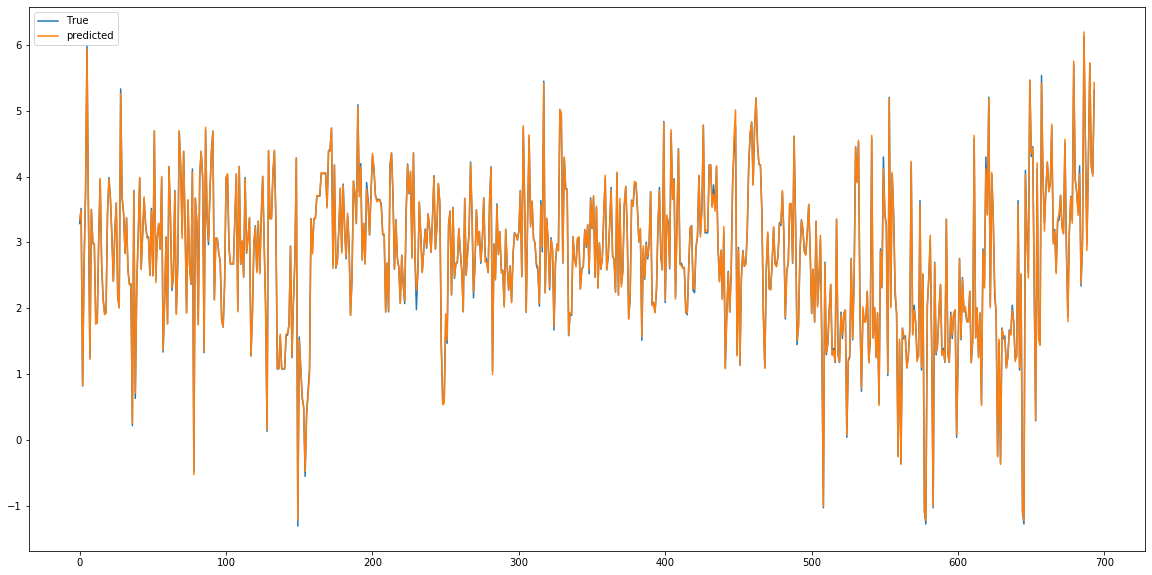

In [73]:
plt.figure(figsize=(20,10))
plt.plot(Y,label="True")
plt.plot(reg.predict(X), label="predicted")
plt.legend()

## Support Vector Regression

In [57]:
from sklearn.preprocessing import StandardScaler
#　標準化
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [63]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_norm, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
# 回帰係数
print(svr.coef_)
 
# 切片 (誤差)
print(svr.intercept_)
 
# 決定係数
print(svr.score(X_norm, Y))

[[-1.62165885e-02  3.79265340e-02 -1.62165885e-02 -1.83944277e-02
  -1.13054250e-02 -7.87191972e-02 -1.00572263e-01 -8.28503134e-02
   9.10071159e-02  1.43344953e-02  7.82458734e-02  4.04957790e-02
   5.10319566e-02 -1.01374070e-02  3.02094761e-02 -4.14885010e-02
   1.13900186e-02 -5.02234886e-02 -1.41162657e-01  3.97214704e-02
   1.32401858e-01  1.29966797e-01  8.41019414e-02  8.83866789e-02
   2.50172958e-01  2.54747156e-02  1.59415628e-01 -5.67436483e-02
   2.35588561e-02  7.39999421e-02  9.92219184e-02 -1.03444945e-01
   3.48827862e-03  5.12215867e-02  2.28080590e-01  1.08907287e-01
   5.43064663e-02 -9.16310834e-02  2.07030656e-02  1.21602797e-02
   5.81946239e-03  3.22122122e-02  2.68362615e-02 -4.48106145e-02
  -2.94988011e-02 -2.26314845e-02 -7.56187855e-03  6.46837833e-02
   5.52934200e-02  5.46152532e-02  6.80735563e-02  2.24068227e-01
  -9.27137004e-02  1.99497587e-03 -1.25954454e-01 -2.73021039e-02
   1.52651628e-01 -5.48882040e-02  5.59306089e-02  0.00000000e+00
  -5.92981

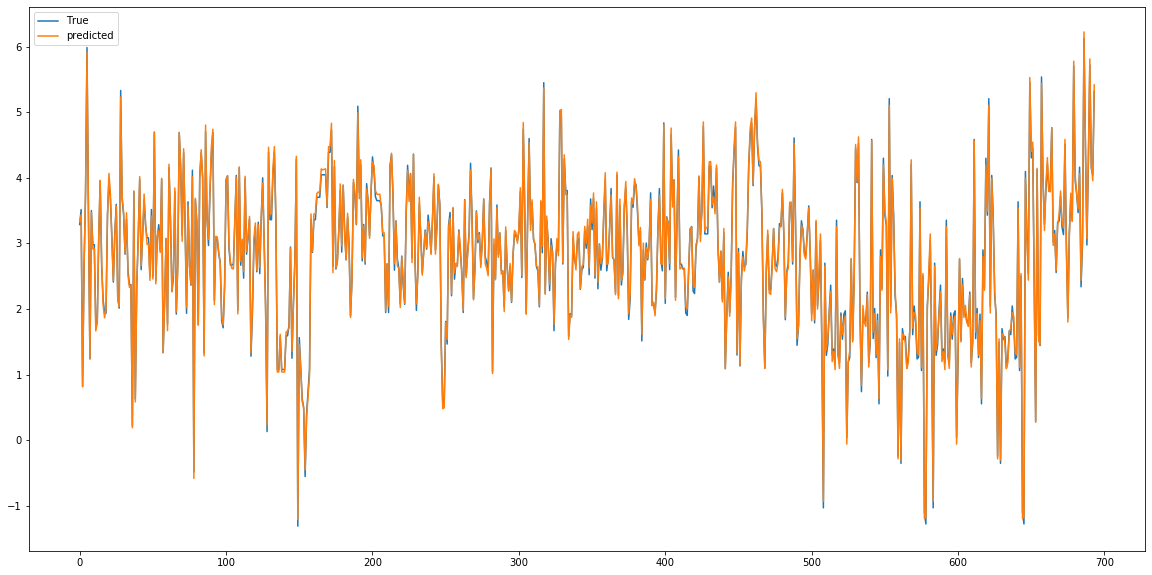

In [75]:
plt.figure(figsize=(20,10))
plt.plot(Y,label="True")
plt.plot(svr.predict(X_norm), label="predicted")
plt.legend()

## Random Forest回帰

In [67]:
from sklearn.ensemble import RandomForestRegressor as RFR
 
rg = RFR(n_jobs=1, random_state=2525)
rg.fit(X_norm, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)

In [77]:
# # 回帰係数
# print(rg.coef_)
 
# 切片 (誤差)
# print(rg.intercept_)
 
# 決定係数
print(rg.score(X_norm, Y))

0.978711579945883


## LightGBM

In [ ]:
import lightgbm as lgb

model = lgb.train